In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Import necessary libraries (FOR REGRESSION)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [91]:
IG = pd.read_csv("top_insta_influencers_data.csv")

In [92]:
IG.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [93]:
IG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [95]:
IG.shape

(200, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Spain'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Uruguay'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'United Arab Emirates'),
  Text(15, 0, 'Puerto Rico'),
  Text(16, 0, "CÃ´te d'Ivoire"),
  Text(17, 0, 'Anguilla'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'British Virgin Islands'),
  Text(21, 0, 'Czech Republic'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Germany'),
  Text(24, 0, 'Russia')])

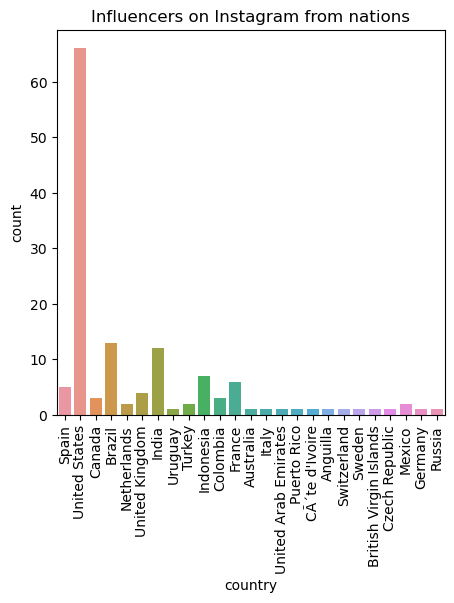

In [98]:
## Visualizing countries using matplotlib and seaborn
plt.figure(figsize=(5,5))
plt.title('Influencers on Instagram from nations')
sns.countplot(x=IG["country"])
plt.xticks(rotation=90)

In [99]:
# typecasting 60_day_eng_rate from string to float using regex (regular expression)
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
convert_column = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
IG[convert_column] = IG[convert_column].replace(replace, regex=True).astype(float)
IG[convert_column]

,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,1.62,5900000.0
2,6.000000e+09,890.0,357300000.0,6800000.0,1.24,4400000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,0.20,665300.0
...,...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,1.40,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,0.64,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,0.26,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,1.42,467700.0


In [100]:
IG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [103]:
## typecasting again 60_day_eng_Rate into float 
eng_rate = IG['60_day_eng_rate']
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}

converted_data = eng_rate.replace(replace, regex=True).astype(float)
converted_data.head()

0    1.39
1    1.62
2    1.24
3    0.97
4    0.20
Name: 60_day_eng_rate, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


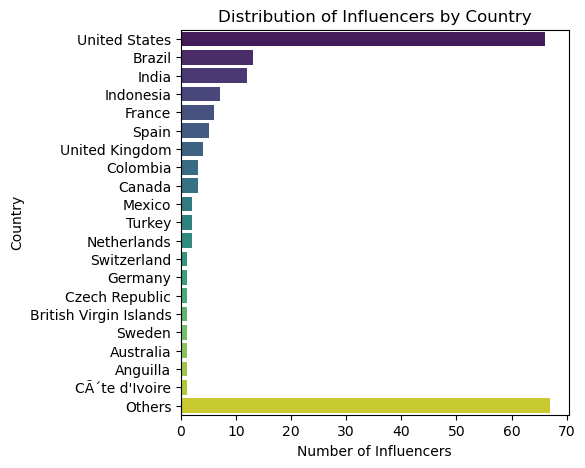

In [107]:
country = IG['country'].value_counts()[:20].to_list()
name_countries = IG['country'].value_counts().index[:20].to_list()

name_countries.append("Others")
max20 = sum(country)
others = len(IG) - max20

country.append(others)

plt.figure(figsize=(5, 5))
sns.barplot(x=country, y=name_countries, palette='viridis')
plt.title('Distribution of Influencers by Country')
plt.xlabel('Number of Influencers')
plt.ylabel('Country')
plt.show()

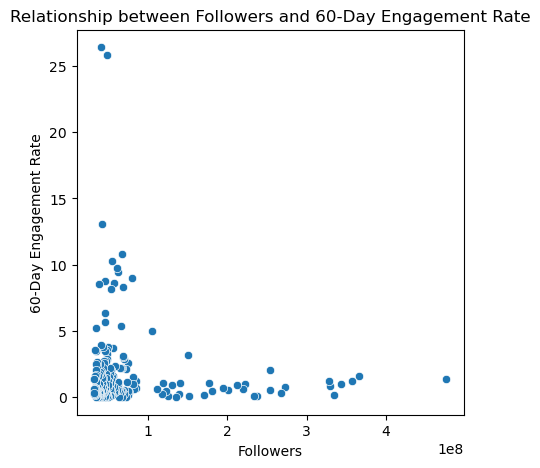

In [110]:
## check which profile has highest engagement rate so take relationship between engagemetn and followers
plt.figure(figsize=(5, 5))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=IG)
plt.title('Relationship between Followers and 60-Day Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('60-Day Engagement Rate')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


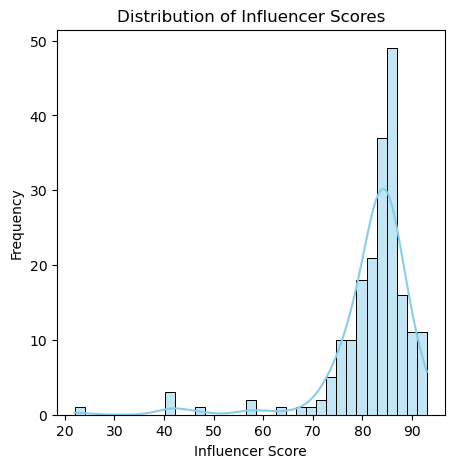

In [113]:
plt.figure(figsize=(5, 5))
sns.histplot(IG['influence_score'], kde=True, color='skyblue')
plt.title('Distribution of Influencer Scores')
plt.xlabel('Influencer Score')
plt.ylabel('Frequency')
plt.show()

In [147]:
# Check for missing values
IG.isnull().sum()

# Fill missing engagement rates with the average engagement rate
IG['60_day_eng_rate'].fillna(IG['60_day_eng_rate'].mean(), inplace=True)

# Drop rows with any missing values
IG.dropna(inplace=True)


print("Data Cleaned")

Data Cleaned


In [148]:
## To make predictions with this data, we’ll need to select a target variable. 
## let’s predict engagement rate based on features like followers, category, and country.
## Here’s a concise approach, including data preparation, model selection, training, and making predictions.
## all required libraries are imported above

In [149]:
features = IG[['followers', 'influence_score', 'country']]
target = IG['60_day_eng_rate']
# next we encode categorical values such as 'country' -> we use this to predict so we convert it to numbers

In [150]:
encoder = LabelEncoder()
# features['category_encoded'] = encoder.fit_transform(features['category'])
features['country_encoded'] = encoder.fit_transform(features['country'])

print("Encoding completed")

Encoding completed


/var/folders/4m/5wzrz4hn5657zm0t_3g3py080000gn/T/ipykernel_18462/2833980362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['country_encoded'] = encoder.fit_transform(features['country'])


In [151]:
features = features[['followers', 'influence_score', 'country_encoded']]

features

,followers,influence_score,country_encoded
0,475800000.0,92,17
1,366200000.0,91,23
3,342700000.0,93,23
4,334100000.0,91,23
5,329200000.0,91,23
...,...,...,...
195,33200000.0,71,23
196,33200000.0,81,8
197,33200000.0,79,2
198,33000000.0,78,23


In [152]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

print("TTS Done")

TTS Done


In [153]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Training Completed")

Training Completed


In [154]:
# random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Training Completed")

Training Completed


In [155]:
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [156]:
lr_preds

array([1.37028635, 1.30255527, 1.01603073, 1.49674945, 1.12804654,
       1.37867911, 1.38950008, 1.32829439, 1.45159326, 1.39365706,
       1.40583913, 1.28780069, 1.42115805, 1.54741186])

In [157]:
rf_preds

array([0.9366, 0.3834, 0.4022, 1.4442, 2.0908, 2.7122, 2.3762, 0.845 ,
       0.3985, 2.2106, 0.8647, 0.2759, 0.9658, 3.249 ])

In [160]:
# Evaluate the models
lr_mse = mean_squared_error(y_test, lr_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

print("Linear Regression MSE:", lr_mse)
print("Random Forest MSE:", rf_mse)

Linear Regression MSE: 4.590033513452199
Random Forest MSE: 5.719710905000001
